In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants (using atomic units where hbar = 1, m_e = 1 for simplicity, adjust as needed)
hbar = 1.0  # Reduced Planck constant
m = 1.0     # Particle mass (e.g., electron mass)

In [3]:
# --- Function to calculate Transmission Coefficient ---
def transmission_coefficient(energy, V0, L):
    """
    Calculates the transmission coefficient T for a particle with energy E
    encountering a potential barrier of height V0 and width L.
    """
    if energy <= 0: # Energy must be positive
        return 0.0
    if L == 0: # No barrier
        return 1.0

    # Case 1: Energy E < V0 (Tunneling)
    if energy < V0:
        if V0 - energy == 0: # Avoid division by zero if E is extremely close to V0
            # This case should ideally be handled by a limit,
            # or just return a value based on the context of E vs V0
            # For simplicity, if E is numerically equal to V0 from below,
            # we can treat it as nearly V0.
            # A more robust solution might use a small epsilon.
            # However, the formula for T has (V0-E) in denominator,
            # but also alpha has sqrt(V0-E).
            # Let's look at the formula for T when E approaches V0:
            # T = [1 + (k0*L/2)^2]^-1 where k0^2 = 2*m*V0/hbar^2
            # This is T = (1 + m*V0*L^2 / (2*hbar^2))^-1
             alpha_squared_L_squared_term = (2 * m * V0 * L**2) / (hbar**2)
             return (1 + alpha_squared_L_squared_term / 4)**-1

        alpha = np.sqrt(2 * m * (V0 - energy)) / hbar
        if np.isinf(np.sinh(alpha * L)): # Handle overflow for large alpha*L
            return 0.0
        numerator = (V0**2) * (np.sinh(alpha * L)**2)
        denominator = 4 * energy * (V0 - energy)
        if denominator == 0: # Avoid division by zero
            return 0.0 # Or handle as a limit
        T = (1 + numerator / denominator)**-1
        return T
    # Case 2: Energy E == V0
    elif energy == V0:
        # Formula for T when E = V0: T = (1 + m*V0*L^2 / (2*hbar^2))^-1
        # This is derived from the limit of the E < V0 or E > V0 case.
        # k0_squared = 2 * m * V0 / (hbar**2)
        # T = (1 + k0_squared * L**2 / 4)**-1
        if V0 == 0: # No barrier, perfect transmission
            return 1.0
        term = (m * V0 * L**2) / (2 * hbar**2)
        T = (1 + term)**-1
        return T
    # Case 3: Energy E > V0 (Above-barrier transmission)
    else:
        k2 = np.sqrt(2 * m * (energy - V0)) / hbar
        numerator = (V0**2) * (np.sin(k2 * L)**2)
        denominator = 4 * energy * (energy - V0)
        if denominator == 0: # Avoid division by zero (shouldn't happen here as E > V0)
             return 1.0 # Or handle as a limit, implies E is very close to V0.
        T = (1 + numerator / denominator)**-1
        return T


In [4]:
# --- Simulation Parameters ---
V0_barrier = 10.0  # Height of the potential barrier (e.g., in eV)
L_barrier_fixed = 0.5 # Fixed width of the barrier (e.g., in Angstroms or Bohr radii)
energy_fixed = 7.0   # Fixed energy for width variation plot (e.g., in eV)

# Energy range for T vs Energy plot
energies = np.linspace(0.1, 2 * V0_barrier, 500) # Avoid E=0 for some formulas

# Barrier width range for T vs Width plot
widths = np.linspace(0.05, 2.0, 200) # Avoid L=0 for some formulas


In [5]:
# --- Calculate Transmission Coefficients ---
T_vs_energy = [transmission_coefficient(E, V0_barrier, L_barrier_fixed) for E in energies]
T_vs_width = [transmission_coefficient(energy_fixed, V0_barrier, L_val) for L_val in widths]

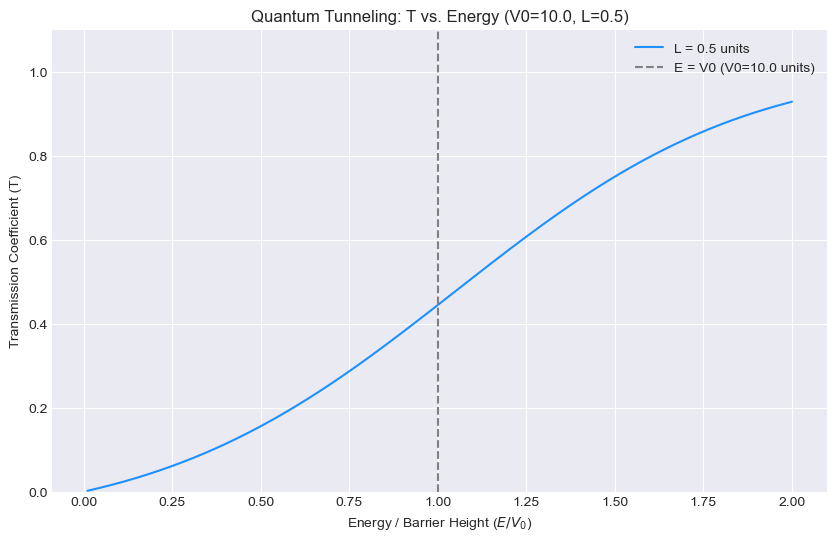

In [6]:
# --- Plotting ---
plt.style.use('seaborn-v0_8-darkgrid') # Using a nice style

# Plot 1: Transmission Coefficient vs. Energy
plt.figure(figsize=(10, 6))
plt.plot(energies / V0_barrier, T_vs_energy, label=f'L = {L_barrier_fixed:.1f} units', color='dodgerblue')
plt.axvline(x=1, color='gray', linestyle='--', label=f'E = V0 (V0={V0_barrier:.1f} units)')
plt.xlabel('Energy / Barrier Height ($E/V_0$)')
plt.ylabel('Transmission Coefficient (T)')
plt.title(f'Quantum Tunneling: T vs. Energy (V0={V0_barrier:.1f}, L={L_barrier_fixed:.1f})')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

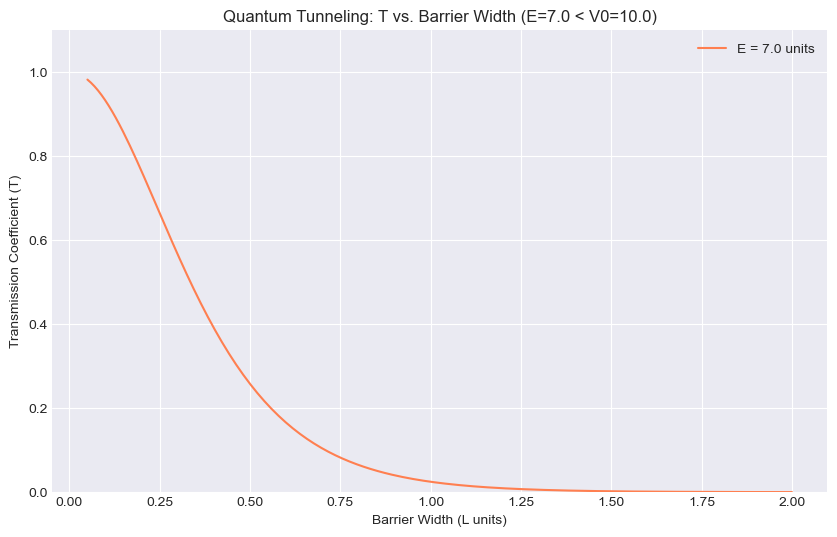

Simulation Complete.
Parameters used: V0 = 10.0, Fixed L = 0.5, Fixed E = 7.0
Constants: hbar = 1.0, m = 1.0


In [7]:
# Plot 2: Transmission Coefficient vs. Barrier Width
plt.figure(figsize=(10, 6))
plt.plot(widths, T_vs_width, label=f'E = {energy_fixed:.1f} units', color='coral')
# Indicate if the fixed energy is above or below the barrier height
if energy_fixed < V0_barrier:
    plot_title = f'Quantum Tunneling: T vs. Barrier Width (E={energy_fixed:.1f} < V0={V0_barrier:.1f})'
elif energy_fixed == V0_barrier:
    plot_title = f'Quantum Tunneling: T vs. Barrier Width (E={energy_fixed:.1f} = V0={V0_barrier:.1f})'
else:
    plot_title = f'Above-Barrier Transmission: T vs. Barrier Width (E={energy_fixed:.1f} > V0={V0_barrier:.1f})'

plt.xlabel('Barrier Width (L units)')
plt.ylabel('Transmission Coefficient (T)')
plt.title(plot_title)
plt.legend()
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

print("Simulation Complete.")
print(f"Parameters used: V0 = {V0_barrier}, Fixed L = {L_barrier_fixed}, Fixed E = {energy_fixed}")
print(f"Constants: hbar = {hbar}, m = {m}")
